In [2]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78163975/how-can-i-fit-data-to-a-lennard-jones-potential-in-gnuplot

In [3]:
def model(r, epsilon, sigma):
    return 4. * epsilon * (np.power(sigma / r, 12.) - np.power(sigma / r, 6.))

In [4]:
p = [2.43, 1.39]

In [31]:
r = np.linspace(1, 4, 50)
y = model(r, *p) + np.random.randn(r.size)

In [22]:
popt, pcov = optimize.curve_fit(
    model, r, y,
    bounds=[(0., 0.), (np.inf, np.inf)]
)
popt, pcov

(array([2.52803424, 1.38555143]),
 array([[ 1.81397282e-02, -7.54928284e-04],
        [-7.54928284e-04,  3.14652401e-05]]))

In [23]:
def factory(x, y):
    def wrapped(p):
        return y - model(x, *p)
    return wrapped

In [26]:
residuals = factory(r, y)

In [27]:
sol = optimize.least_squares(residuals, x0=p, loss="cauchy", bounds=[(0, 0), (np.inf, np.inf)])

In [28]:
rlin = np.linspace(r.min(), r.max(), 201)
yhat = model(rlin, *popt)

In [29]:
yg = model(rlin, *p)

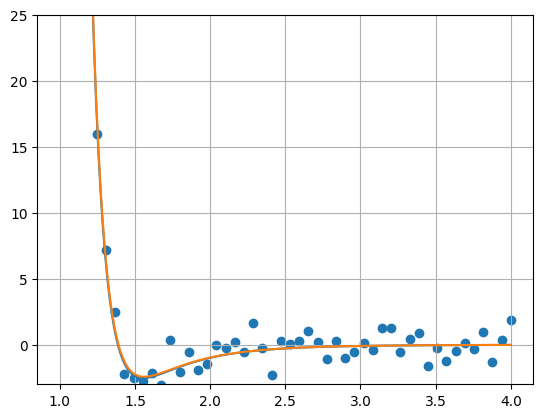

In [30]:
fig, axe = plt.subplots()
axe.scatter(r, y)
axe.plot(rlin, yhat)
axe.plot(rlin, yg)
axe.set_ylim([-3, 25])
axe.grid()